# 9.5 多尺度目标检测

In [1]:
%matplotlib inline
from PIL import Image
import numpy as np
import torch

import sys
sys.path.append("..") 
import d2lzh_pytorch as d2l
print(torch.__version__) # 1.2.0

img = Image.open('../../docs/img/catdog.jpg')
w, h = img.size
w, h

1.2.0


(728, 561)

In [2]:
d2l.set_figsize()

def display_anchors(fmap_w, fmap_h, s):
    # 前两维的取值不影响输出结果(原书这里是(1, 10, fmap_w, fmap_h), 我认为错了)
    fmap = torch.zeros((1, 10, fmap_h, fmap_w), dtype=torch.float32)
    
    # 平移所有锚框使均匀分布在图片上
    offset_x, offset_y = 1.0/fmap_w, 1.0/fmap_h
    anchors = d2l.MultiBoxPrior(fmap, sizes=s, ratios=[1, 2, 0.5]) + \
        torch.tensor([offset_x/2, offset_y/2, offset_x/2, offset_y/2])
    
    bbox_scale = torch.tensor([[w, h, w, h]], dtype=torch.float32)
    d2l.show_bboxes(d2l.plt.imshow(img).axes,
                    anchors[0] * bbox_scale)

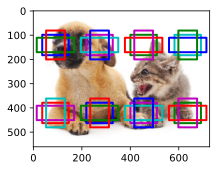

In [3]:
display_anchors(fmap_w=4, fmap_h=2, s=[0.15])

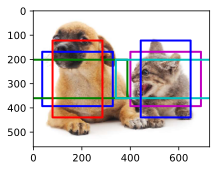

In [4]:
display_anchors(fmap_w=2, fmap_h=1, s=[0.4])

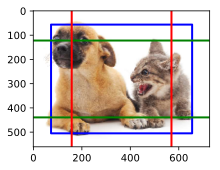

In [5]:
display_anchors(fmap_w=1, fmap_h=1, s=[0.8])